# 05. Interpolation - Multiple Linear Regression

In this tutorial, we'll cover the interpolation of point data using the Multiple Linear Regression (MLR) methodology, available in PyMica as `mlr`. This methodology requires location (`lon` and `lat`), predictor variables such as altitude (`altitude`) or distance to coast line (among others), and value to interpolate.

We'll use Meteorological Service of Catalonia sample data to demonstrate how to apply this interpolation technique. Therefore, we need to import the required modules. First, we need to load observation data and also the PyMica class.

In [1]:
import json

from pymica.pymica import PyMica

Let's call the PyMica class with the appropriate parameters, setting the methodology to `mlr` and the configuration dictionary as follows:

In [2]:
config_file = 'sample-data/configuration_sample.json'

with open('sample-data/configuration_sample.json', 'r') as f_p:
    config = json.load(f_p)

config['mlr']

{'clusters': 'None',
 'variables_files': {'altitude': 'sample-data/explanatory/cat_dem_25831.tif',
  'dist': 'sample-data/explanatory/cat_distance_coast.tif'},
 'interpolation_bounds': [260000, 4488100, 530000, 4750000],
 'resolution': 270,
 'EPSG': 25831}

where:

- `clusters`: set to None as no clusters will be used.
- `variables_files`: dictionary with predictor variables as keys and their corresponding GeoTIFF path as values. Here, altitude as `altitude` and distance to coast line as `dist`.
- `interpolation_bounds`: [minimum_x_coordinate, minimum_y_coordinate, maximum_x_coordinate, maximum_y_coordinate], it must be the same as the variable files.
- `resolution`: spatial resolution.
- `EPSG`: EPSG projection code.

With all these parameters and configurations set, let's initialize the `PyMica` class with the methodology set to 'mlr'.

In [3]:
mlr_method = PyMica(methodology='mlr', config=config_file)

/home/ecm/anaconda3/envs/pymica-test/lib/python3.10/site-packages/osgeo/osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Now that we have the interpolator set, we can input some data for interpolation. We will use data from the Meteorological Service of Catalonia AWS network.


In [4]:
with open('sample-data/data/smc_data.json', 'r') as f_p:
    data = json.load(f_p)

data[0]

{'id': 'C6',
 'value': 8.8,
 'lon': 0.9517200000000001,
 'lat': 41.6566,
 'altitude': 264.0,
 'dist': 0.8587308027349195}

As we can see, the first element of the data meets the requirements of PyMica input data and has the same predictor variables as the ones provided in the configuration dictionary. Therefore, we only need to call the `interpolate` method from the `mlr_method` interpolator class.

In [5]:
data_field = mlr_method.interpolate(data)

Now, we can get a quick look of the `data_field` array using `matplotlib`.

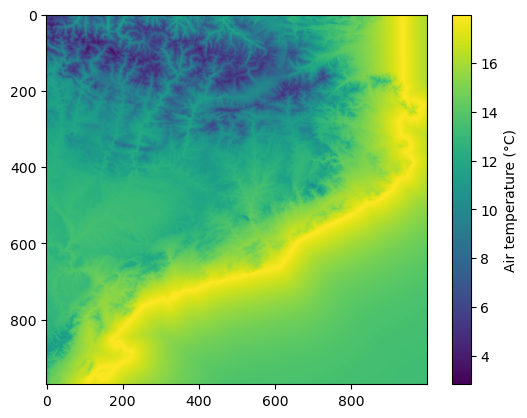

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data_field)
plt.colorbar(label='Air temperature (\u00b0C)')

We have now completed this tutorial on how to interpolate station data using the `mlr` methodology. You can experiment with changing the `variables_files` in the configuration dictionary to observe how the behavior of each variable affects the interpolation result.
